In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 1: Reading of train and test files

In [2]:
train_data=pd.read_csv('Data-Train.csv', index_col=0)
test_data=pd.read_csv('Data-Test.csv', index_col=0)

original_train_data = train_data
original_test_data = test_data

train_data.head()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
0,68,28,3.0,100.0,9,1.561599,799.0,237.206500,186.956968,11.785714,4,35.498327,0.114401,3.046749,0.562923,0.206291,2.173474,3.628150,2.181482,14
1,31,6,3.0,100.0,2,7.747685,352.0,178.540538,129.123143,25.785714,7,25.633478,0.000000,3.005766,0.000000,0.444095,1.927769,3.058834,1.511026,2
2,27,19,3.0,60.0,2,3.899665,293.0,119.066221,59.136199,21.357143,6,32.228120,0.158911,2.935705,0.293093,0.132959,2.324772,2.650857,1.665037,16
3,52,4,3.0,80.0,1,1.585429,537.0,139.452545,68.572100,7.285714,5,29.304317,0.186522,2.810752,0.242181,0.000000,2.192938,2.026259,2.481082,13
4,3,28,3.0,100.0,14,4.623051,6668.0,298.106532,244.047761,296.214286,5,29.132081,0.300183,3.032527,0.391279,0.103062,2.135294,2.736957,1.979200,159


# Step 2: Insights into data set based on summary of the data

In [3]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1576 entries, 0 to 1575
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   productID             1576 non-null   int64  
 1   brandID               1576 non-null   int64  
 2   attribute1            1576 non-null   float64
 3   attribute2            1576 non-null   float64
 4   attribute3            1576 non-null   int64  
 5   attribute4            1576 non-null   float64
 6   clickVolume           1576 non-null   float64
 7   avgOriginalUnitPrice  1576 non-null   float64
 8   avgFinalUnitPrice     1576 non-null   float64
 9   ma14SalesVolume       1576 non-null   float64
 10  weekday               1576 non-null   int64  
 11  meanAge               1576 non-null   float64
 12  gender                1576 non-null   float64
 13  meanEducation         1576 non-null   float64
 14  maritalStatus         1576 non-null   float64
 15  plus                  1576

In [4]:
print(train_data.isnull().sum())

productID               0
brandID                 0
attribute1              0
attribute2              0
attribute3              0
attribute4              0
clickVolume             0
avgOriginalUnitPrice    0
avgFinalUnitPrice       0
ma14SalesVolume         0
weekday                 0
meanAge                 0
gender                  0
meanEducation           0
maritalStatus           0
plus                    0
meanPurchasePower       0
meanUserLevel           0
meanCityLevel           0
sales                   0
dtype: int64


In [5]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1051 entries, 0 to 1050
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   productID             1051 non-null   int64  
 1   brandID               1051 non-null   int64  
 2   attribute1            1051 non-null   float64
 3   attribute2            1051 non-null   float64
 4   attribute3            1051 non-null   int64  
 5   attribute4            1051 non-null   float64
 6   clickVolume           1051 non-null   float64
 7   avgOriginalUnitPrice  1051 non-null   float64
 8   avgFinalUnitPrice     1051 non-null   float64
 9   ma14SalesVolume       1051 non-null   float64
 10  weekday               1051 non-null   int64  
 11  meanAge               1051 non-null   float64
 12  gender                1051 non-null   float64
 13  meanEducation         1051 non-null   float64
 14  maritalStatus         1051 non-null   float64
 15  plus                  1051

In [6]:
print(test_data.isnull().sum())

productID               0
brandID                 0
attribute1              0
attribute2              0
attribute3              0
attribute4              0
clickVolume             0
avgOriginalUnitPrice    0
avgFinalUnitPrice       0
ma14SalesVolume         0
weekday                 0
meanAge                 0
gender                  0
meanEducation           0
maritalStatus           0
plus                    0
meanPurchasePower       0
meanUserLevel           0
meanCityLevel           0
dtype: int64


Based on the codes above, we can conclude that there are no missing data in the data set for both train and test sets.

# Step 3: Check for duplicates in the data sets

In [7]:
duplicates_train = train_data[train_data.duplicated()]

if duplicates_train.empty:
    print("There are no duplicates in the train data set.")
else:
    print("There are duplicates in the train data set.")
    print(duplicates_train)

There are no duplicates in the train data set.


In [8]:
duplicates_test = test_data[test_data.duplicated()]

if duplicates_test.empty:
    print("There are no duplicates in the test data set.")
else:
    print("There are duplicates in the test data set.")
    print(duplicates_test)

There are no duplicates in the test data set.


# Step 4: Identification of Categorical Variables

By identifying the number of unique values held by each column, we can deduce that those with less number of unique values tend to be categorical variables with repetition of these certain unique values. As such, we should remove them from the data set to make the results more meaningful.

In [9]:
train_data.nunique()

productID                 59
brandID                   36
attribute1                 4
attribute2                 7
attribute3                26
attribute4              1576
clickVolume              968
avgOriginalUnitPrice    1576
avgFinalUnitPrice       1576
ma14SalesVolume          663
weekday                    7
meanAge                 1576
gender                  1340
meanEducation           1576
maritalStatus           1494
plus                    1381
meanPurchasePower       1576
meanUserLevel           1576
meanCityLevel           1576
sales                    196
dtype: int64

In [10]:
test_data.nunique()

productID                 58
brandID                   36
attribute1                 4
attribute2                 7
attribute3                24
attribute4              1051
clickVolume              745
avgOriginalUnitPrice    1051
avgFinalUnitPrice       1051
ma14SalesVolume          531
weekday                    7
meanAge                 1051
gender                   909
meanEducation           1051
maritalStatus           1004
plus                     914
meanPurchasePower       1051
meanUserLevel           1051
meanCityLevel           1051
dtype: int64

Based on a comparison, those variables which are likely to be categorical variables are "productID", "brandID", "attribute1","attribute2","attribute3" and "weekday". 

# Step 5: Conversion of identified categorical variables using OneHotEncoder

In [11]:
catvar = ['productID', 'brandID', 'attribute1', 'attribute2', 'attribute3', 'weekday'] 

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

transformed_columns = encoder.fit_transform(train_data[catvar])

encoded_dataset = pd.DataFrame(transformed_columns, columns=encoder.get_feature_names_out(catvar))

train_data = train_data.drop(columns=catvar)

train_data = pd.concat([train_data, encoded_dataset], axis=1)
train_data.to_csv("Train_data", index=False)

D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
train_data.head()

,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute3_24,attribute3_25,attribute3_28,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,1.561599,799.0,237.206500,186.956968,11.785714,35.498327,0.114401,3.046749,0.562923,0.206291,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7.747685,352.0,178.540538,129.123143,25.785714,25.633478,0.000000,3.005766,0.000000,0.444095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.899665,293.0,119.066221,59.136199,21.357143,32.228120,0.158911,2.935705,0.293093,0.132959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.585429,537.0,139.452545,68.572100,7.285714,29.304317,0.186522,2.810752,0.242181,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.623051,6668.0,298.106532,244.047761,296.214286,29.132081,0.300183,3.032527,0.391279,0.103062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
catvar = ['productID', 'brandID', 'attribute1', 'attribute2', 'attribute3', 'weekday'] 

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

transformed_columns = encoder.fit_transform(test_data[catvar])

encoded_dataset = pd.DataFrame(transformed_columns, columns=encoder.get_feature_names_out(catvar))

test_data = test_data.drop(columns=catvar)

test_data = pd.concat([test_data, encoded_dataset], axis=1)

D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
test_data.columns

Index(['attribute4', 'clickVolume', 'avgOriginalUnitPrice',
       'avgFinalUnitPrice', 'ma14SalesVolume', 'meanAge', 'gender',
       'meanEducation', 'maritalStatus', 'plus',
       ...
       'attribute3_25', 'attribute3_27', 'attribute3_29', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weekday_7'],
      dtype='object', length=149)

# Step 6: Checking data pattern of Sales

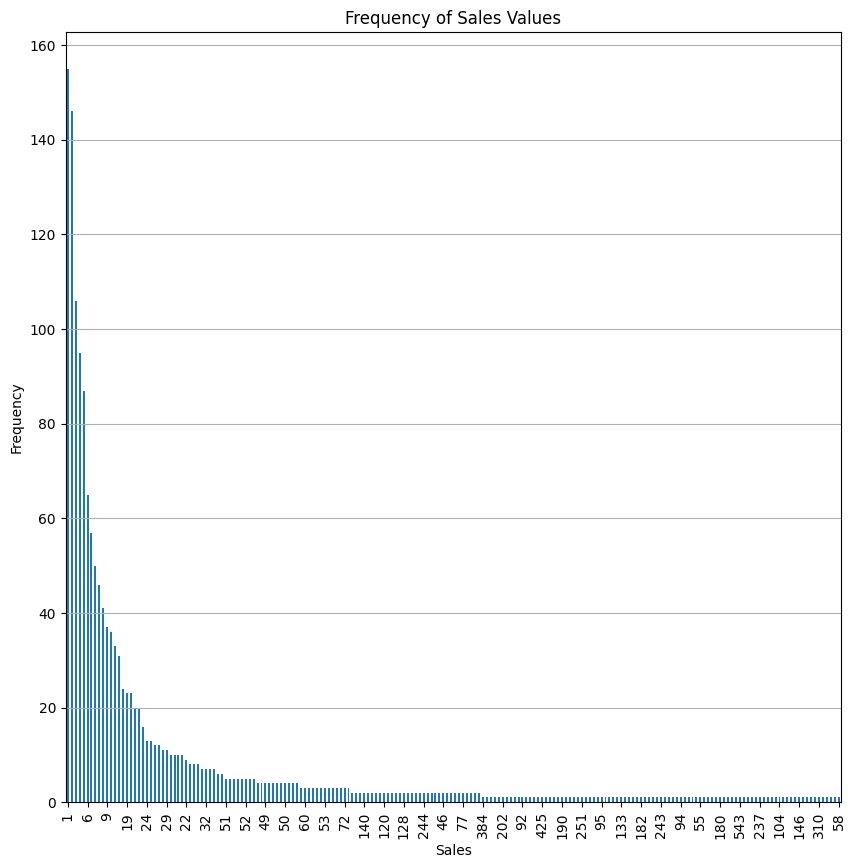

In [15]:
plt.figure(figsize=(10, 10))
sales_frequency = train_data['sales'].value_counts()
sales_frequency.plot(kind='bar')
plt.title('Frequency of Sales Values')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.xticks(range(0, len(sales_frequency), 5), sales_frequency.index[::5])
plt.show()

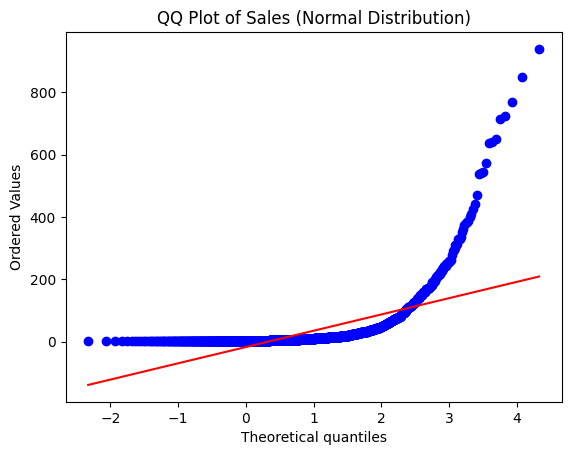

In [16]:
from scipy.stats import probplot
probplot(train_data['sales'], dist='norm', sparams=(1,), plot=plt)
plt.title('QQ Plot of Sales (Normal Distribution)')
plt.show()

From the graph and QQ Plot, we can see that sales does not follow a normal distribution but rather seems to fit a distribution similar to exponential or lognormal.

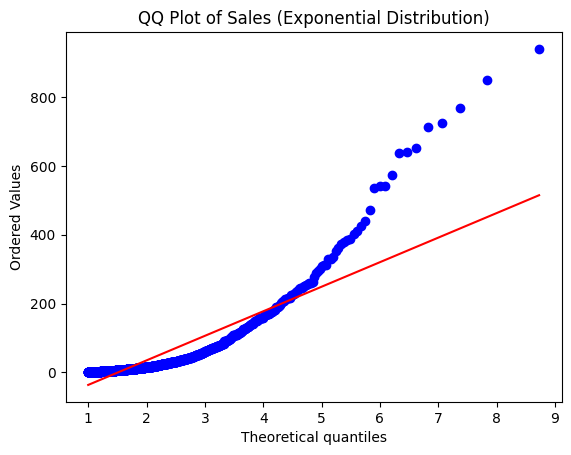

In [17]:
probplot(train_data['sales'], dist='expon', sparams=(1,), plot=plt)
plt.title('QQ Plot of Sales (Exponential Distribution)')
plt.show()

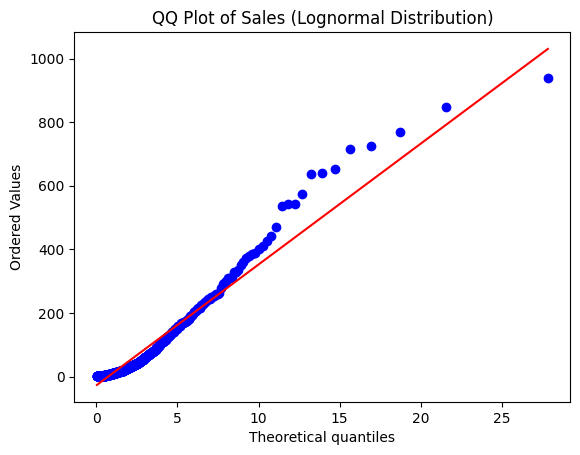

In [18]:
probplot(train_data['sales'], dist='lognorm', sparams=(1,), plot=plt)
plt.title('QQ Plot of Sales (Lognormal Distribution)')
plt.show()

Comparing the two distribution, lognormal distribution is likely to be a better fit than exponential. To confirm, we plot a QQplot for log-sales.

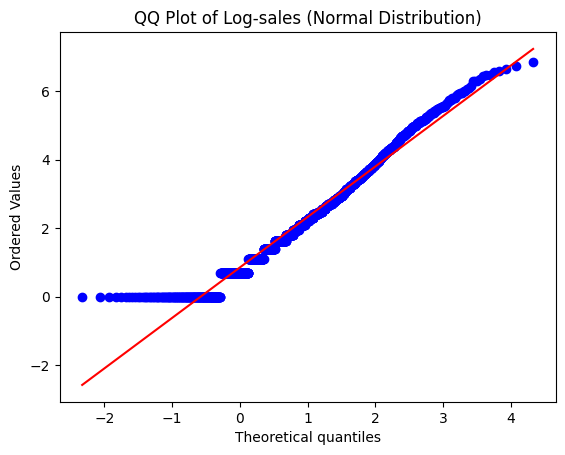

In [19]:
logsales = np.log(train_data.sales)
probplot(logsales, dist='norm', sparams=(1,), plot=plt)
plt.title('QQ Plot of Log-sales (Normal Distribution)')
plt.show()

As such, we conclude that the sales follow a lognormal distribution.

# Step 7: Preparation of training and test data

In [20]:
train_X_cat = train_data.drop('sales',axis=1)

train_X_num = original_train_data.drop('sales',axis=1)

train_y_sales = train_data.sales

train_y_logsales = logsales

test_X_cat = test_data

test_X_num = original_test_data

# Step 8: Refitting data columns in data set

In [21]:
for column in train_X_cat.columns:
    if column not in test_X_cat.columns:
        position = list(train_X_cat.columns).index(column)
        test_data.insert(position, column, pd.Series([0] * len(test_X_cat)))

for column in test_X_cat.columns:
    if column not in train_X_cat.columns:
        position = list(test_X_cat.columns).index(column)
        train_X_cat.insert(position, column, pd.Series([0] * len(train_X_cat)))

# Step 9: Standardisation

In [22]:
ss=StandardScaler(with_mean=False)

train_X_cat_stan = ss.fit_transform(train_X_cat)
train_X_cat_stan = pd.DataFrame(train_X_cat_stan,columns=train_X_cat.columns)

train_X_num_stan = ss.fit_transform(train_X_num)
train_X_num_stan = pd.DataFrame(train_X_num_stan,columns=train_X_num.columns)

test_X_cat_stan = ss.fit_transform(test_X_cat)
test_X_cat_stan = pd.DataFrame(test_X_cat_stan,columns=test_X_cat.columns)

test_X_num_stan = ss.fit_transform(test_X_num)
test_X_num_stan = pd.DataFrame(test_X_num_stan,columns=test_X_num.columns)

# Step 10: Export data to CSV files

In [23]:
train_X_cat.to_csv('train_X_cat.csv')

train_X_num.to_csv('train_X_num.csv')

train_X_cat_stan.to_csv('train_X_cat_stan.csv')

train_X_num_stan.to_csv('train_X_num_stan.csv')

train_y_sales.to_csv('train_y_sales.csv')

train_y_logsales.to_csv('train_y_logsales.csv')

test_X_cat.to_csv('test_X_cat.csv')

test_X_num.to_csv('test_X_num.csv')
        
test_X_cat_stan.to_csv('test_X_cat_stan.csv')

test_X_num_stan.to_csv('test_X_num_stan.csv')

In [24]:
train_X_num.head()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel
0,68,28,3.0,100.0,9,1.561599,799.0,237.206500,186.956968,11.785714,4,35.498327,0.114401,3.046749,0.562923,0.206291,2.173474,3.628150,2.181482
1,31,6,3.0,100.0,2,7.747685,352.0,178.540538,129.123143,25.785714,7,25.633478,0.000000,3.005766,0.000000,0.444095,1.927769,3.058834,1.511026
2,27,19,3.0,60.0,2,3.899665,293.0,119.066221,59.136199,21.357143,6,32.228120,0.158911,2.935705,0.293093,0.132959,2.324772,2.650857,1.665037
3,52,4,3.0,80.0,1,1.585429,537.0,139.452545,68.572100,7.285714,5,29.304317,0.186522,2.810752,0.242181,0.000000,2.192938,2.026259,2.481082
4,3,28,3.0,100.0,14,4.623051,6668.0,298.106532,244.047761,296.214286,5,29.132081,0.300183,3.032527,0.391279,0.103062,2.135294,2.736957,1.979200


In [25]:
train_X_cat.head()

,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute3_28,attribute3_27,attribute3_29,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,1.561599,799.0,237.206500,186.956968,11.785714,35.498327,0.114401,3.046749,0.562923,0.206291,...,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7.747685,352.0,178.540538,129.123143,25.785714,25.633478,0.000000,3.005766,0.000000,0.444095,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.899665,293.0,119.066221,59.136199,21.357143,32.228120,0.158911,2.935705,0.293093,0.132959,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.585429,537.0,139.452545,68.572100,7.285714,29.304317,0.186522,2.810752,0.242181,0.000000,...,0.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.623051,6668.0,298.106532,244.047761,296.214286,29.132081,0.300183,3.032527,0.391279,0.103062,...,0.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
